## Importing libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Loading data

In [2]:
df = pd.read_csv(r'C:\Users\admin\Downloads\gene_expression.csv')

In [4]:
df.head(10)

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
5,3.4,7.5,0
6,3.1,6.8,0
7,6.3,4.9,1
8,5.5,8.6,0
9,7.7,3.5,1


# Data exploration

In [10]:
df.isnull().sum() #we dont have missing values

Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64

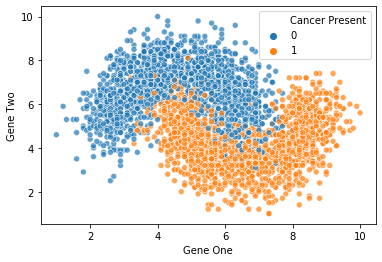

In [15]:
sns.scatterplot(x = "Gene One", y = "Gene Two", hue = ("Cancer Present"),alpha = 0.7,data = df)

# Taking closer look to the overlapping region

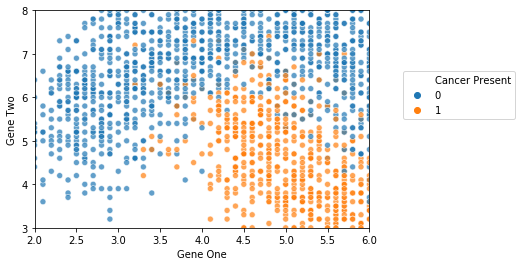

In [18]:
sns.scatterplot(x = "Gene One", y = "Gene Two", hue = ("Cancer Present"),alpha = 0.7,data = df)
plt.xlim(2,6)
plt.ylim(3,8)
plt.legend(loc = (1.1, 0.5))

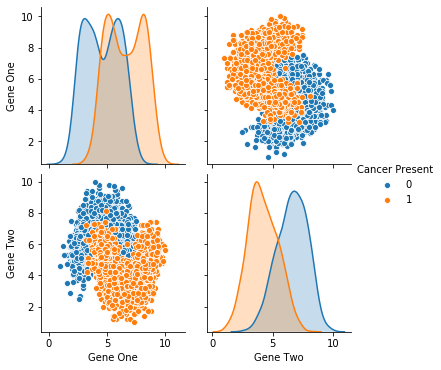

In [21]:
sns.pairplot(data=df, hue = "Cancer Present")

In [23]:
X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =42)

In [38]:
scaler = StandardScaler()
scaler_X_train = scaler.fit_transform(X_train)
scaler_X_test = scaler.transform(X_test)

In [42]:
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(scaler_X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [50]:
y_pred = knn_model.predict(scaler_X_test)

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       470
           1       0.88      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



In [53]:
print(accuracy_score(y_test, y_pred))

0.8922222222222222


In [54]:
confusion_matrix(y_test, y_pred)

array([[420,  50],
       [ 47, 383]], dtype=int64)

## Best n_neighbors value with elbow method:


In [69]:
test_errors = []

for k in range (1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaler_X_train, y_train)
    y_pred_test = knn_model.predict(scaler_X_test)
    
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    test_errors.append(test_error)

errorpercentage = [element * 100 for element in test_errors]

Text(0.5, 0, 'K value')

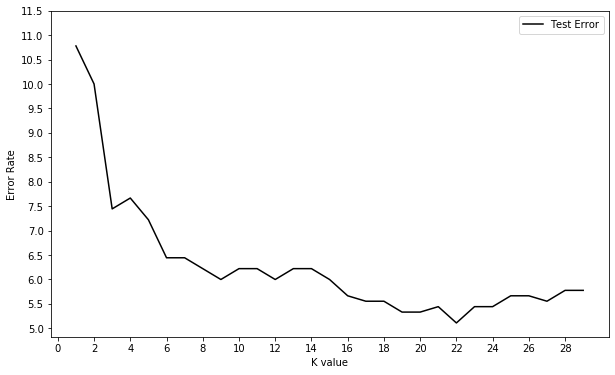

In [77]:
plt.figure(figsize=(10,6))
plt.plot (range(1,30), errorpercentage, label = 'Test Error', color = 'black')
plt.legend()
plt.yticks(np.arange(5,12,0.5))
plt.xticks(np.arange(0,30,2))
plt.ylabel("Error Rate")
plt.xlabel("K value")

# KNN Regression

## Pros:

#### 1. Easy to understand

#### 2. No assumptions needed about how data should be

#### 3. Works well w/ non-linear relationships

## Cons: 
#### Gets slower when data is big

# Real example

In [79]:
data = sns.load_dataset('tips')
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [88]:
X = data[['total_bill','size']].values
y = data['tip'].values

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(183, 2)
(61, 2)
(183,)
(61,)


In [93]:
y_train

array([ 2.  ,  1.98,  2.34,  2.64,  4.5 ,  2.  ,  2.  ,  3.09,  5.15,
        2.  ,  1.76,  4.19,  4.06,  1.25,  4.29,  2.92,  4.3 ,  3.6 ,
        3.07,  1.71,  4.  ,  4.  ,  3.11,  3.  ,  3.75,  1.5 ,  5.  ,
        3.18,  4.  ,  4.73,  2.3 ,  2.  ,  2.45,  3.  ,  2.5 ,  3.06,
        1.58,  4.71,  4.08,  6.73,  9.  ,  2.31,  3.27,  1.68,  3.12,
        2.  ,  5.92,  3.71,  4.2 ,  2.  ,  2.31,  1.5 ,  1.61,  1.66,
        3.76,  1.47,  3.5 , 10.  ,  1.25,  5.  ,  3.39,  1.83,  2.01,
        3.15,  4.  ,  3.48,  1.45,  3.51,  3.41,  5.  ,  2.09,  2.  ,
        3.76,  6.7 ,  2.  ,  2.5 ,  1.96,  3.5 ,  1.56,  2.  ,  3.16,
        1.5 ,  2.5 ,  3.  ,  1.01,  3.  ,  4.  ,  5.  ,  4.  ,  3.23,
        2.55,  3.  ,  3.  ,  3.31,  3.5 ,  2.71,  3.25,  1.63,  2.  ,
        3.23,  2.5 ,  1.73,  2.88,  2.6 ,  2.  ,  6.5 ,  3.4 ,  4.08,
        3.5 ,  2.83,  2.  ,  1.67,  5.2 ,  1.  ,  3.  ,  3.  ,  3.  ,
        5.14,  2.  ,  5.  ,  6.  ,  4.  ,  2.  ,  3.61,  1.48,  3.  ,
        3.55,  2.  ,

In [91]:
# dummy predictor
y_test_native_pred = np.ones(y_test.shape[0])*y_train.mean()
y_test_native_pred

array([3.06945355, 3.06945355, 3.06945355, 3.06945355, 3.06945355,
       3.06945355, 3.06945355, 3.06945355, 3.06945355, 3.06945355,
       3.06945355, 3.06945355, 3.06945355, 3.06945355, 3.06945355,
       3.06945355, 3.06945355, 3.06945355, 3.06945355, 3.06945355,
       3.06945355, 3.06945355, 3.06945355, 3.06945355, 3.06945355,
       3.06945355, 3.06945355, 3.06945355, 3.06945355, 3.06945355,
       3.06945355, 3.06945355, 3.06945355, 3.06945355, 3.06945355,
       3.06945355, 3.06945355, 3.06945355, 3.06945355, 3.06945355,
       3.06945355, 3.06945355, 3.06945355, 3.06945355, 3.06945355,
       3.06945355, 3.06945355, 3.06945355, 3.06945355, 3.06945355,
       3.06945355, 3.06945355, 3.06945355, 3.06945355, 3.06945355,
       3.06945355, 3.06945355, 3.06945355, 3.06945355, 3.06945355,
       3.06945355])

In [101]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


In [121]:
knn = KNeighborsRegressor(n_neighbors = 27)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [122]:
print("Prediction MSE with KNN:", mean_squared_error(y_test, y_pred))

Prediction MSE with KNN: 0.9330596437968022


In [123]:
print("Prediction MSE with dummy mean:", mean_squared_error(y_test, y_test_native_pred))

Prediction MSE with dummy mean: 1.690554128221207


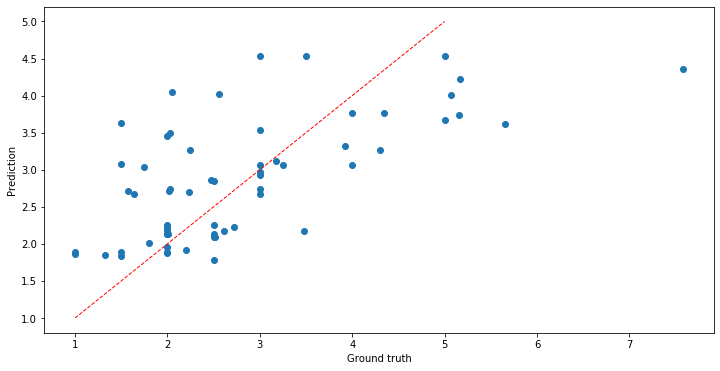

In [124]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Ground truth')
plt.ylabel('Prediction')
plt.plot([1, 5], [1, 5], c='r', linestyle='--', linewidth=1.)
plt.show()
